# **Optimizing Credit Scoring for Home Credit**
Latar Belakang Tugas Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

Tahapan Pengerjaan
1. Download Dataset yang dibutuhkan.

2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.

3. Pahami deskripsi kolom yang tersedia.

4. Tentukan goal, objective, dan metrics dari masalah yang ada.

5. Lakukan penggalian informasi terkait kondisi data awal.

6. Lakukan proses Data Cleaning dan Data Processing.

7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.

8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.

9. Evaluasi hasil pemodelan.

10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.

11. Push file .ipynb mu ke dalam github.

12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya


In [50]:
from pprint import pprint
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
#memanggil data training dan testing

data_train=pd.read_csv('/content/drive/MyDrive/Rakamin/application_train.csv')
data_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
data_test=pd.read_csv('/content/drive/MyDrive/Rakamin/application_test.csv')
data_test


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Data Preprocessing
Sebelum checking missing value, terlebih dahulu akan dipilih beberapa variabel yang akan digunakan untuk pemodelan.

In [53]:
# mengetahui variabel-variabel yang ada
data_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [54]:
train=data_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

test=data_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

In [55]:
print(train.isnull().sum())

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
dtype: int64


In [56]:
print(test.isnull().sum())

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE               911
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
dtype: int64


Berdasarkan output di atas dapat dilihat bahwa terdapat missing value pada data training dan testing. Penanganan missing value pada kali ini akan dilakukan dengan cara remove missing values.

In [57]:
train=train.dropna()
test=test.dropna()

In [58]:
print(train['TARGET'].unique(),'\n',
      train['NAME_CONTRACT_TYPE'].unique(),'\n',
      train['CODE_GENDER'].unique(),'\n',
      train['FLAG_OWN_CAR'].unique(),'\n',
      train['FLAG_OWN_REALTY'].unique(),'\n',
      train['NAME_TYPE_SUITE'].unique(),'\n',
      train['NAME_INCOME_TYPE'].unique(),'\n',
      train['NAME_EDUCATION_TYPE'].unique(),'\n',
      train['NAME_FAMILY_STATUS'].unique(),'\n',
      train['NAME_HOUSING_TYPE'].unique())

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [59]:
print(test['NAME_CONTRACT_TYPE'].unique(),'\n',
      test['CODE_GENDER'].unique(),'\n',
      test['FLAG_OWN_CAR'].unique(),'\n',
      test['FLAG_OWN_REALTY'].unique(),'\n',
      test['NAME_TYPE_SUITE'].unique(),'\n',
      test['NAME_INCOME_TYPE'].unique(),'\n',
      test['NAME_EDUCATION_TYPE'].unique(),'\n',
      test['NAME_FAMILY_STATUS'].unique(),'\n',
      test['NAME_HOUSING_TYPE'].unique())

['Cash loans' 'Revolving loans'] 
 ['F' 'M'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A'] 
 ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed'] 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


Dapat dilihat pada output di atas bahwa tidak terdapat kesalahan tulis (typo) pada kategori-kategori di tiap variabel kategorik. Namun, pada variabel CODE_GENDER terdapat kategori XNA pada data training sehingga harus ditangani dengan cari dibuang dari dataset. Selain itu, pada NAME_INCOME_TYPE juga terdapat kategori Maternity leave pada data training namun pada data testing tidak sehingga akan dihapus juga.

In [60]:
train.drop(train.index[train['CODE_GENDER']=='XNA'],inplace=True)
train.drop(train.index[train['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

In [61]:
print(train['CODE_GENDER'].unique(),'\n',
      train['NAME_INCOME_TYPE'].unique(),'\n')

['M' 'F'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman'] 



In [62]:
print(len(train))
print(len(test))

306198
47809


Variabel DAYS_BIRTH kurang bisa memberikan makna untuk pemodelan sehingga akan diganti dengan variabel yang berisi umur pelanggan.

In [63]:
AGE_TR=(train['DAYS_BIRTH']/-365).astype(int)
AGE_TS=(test['DAYS_BIRTH']/-365).astype(int)

In [64]:
train=train.assign(AGE=AGE_TR).drop('DAYS_BIRTH',axis=1)
train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,56
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,41
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,32


In [65]:
test=test.assign(AGE=AGE_TS).drop('DAYS_BIRTH',axis=1)
test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,54
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,30
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,43
48742,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,38


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306198 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306198 non-null  int64  
 1   NAME_CONTRACT_TYPE          306198 non-null  object 
 2   CODE_GENDER                 306198 non-null  object 
 3   FLAG_OWN_CAR                306198 non-null  object 
 4   FLAG_OWN_REALTY             306198 non-null  object 
 5   CNT_CHILDREN                306198 non-null  int64  
 6   AMT_INCOME_TOTAL            306198 non-null  float64
 7   AMT_CREDIT                  306198 non-null  float64
 8   AMT_ANNUITY                 306198 non-null  float64
 9   AMT_GOODS_PRICE             306198 non-null  float64
 10  NAME_TYPE_SUITE             306198 non-null  object 
 11  NAME_INCOME_TYPE            306198 non-null  object 
 12  NAME_EDUCATION_TYPE         306198 non-null  object 
 13  NAME_FAMILY_ST

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 48743
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NAME_CONTRACT_TYPE          47809 non-null  object 
 1   CODE_GENDER                 47809 non-null  object 
 2   FLAG_OWN_CAR                47809 non-null  object 
 3   FLAG_OWN_REALTY             47809 non-null  object 
 4   CNT_CHILDREN                47809 non-null  int64  
 5   AMT_INCOME_TOTAL            47809 non-null  float64
 6   AMT_CREDIT                  47809 non-null  float64
 7   AMT_ANNUITY                 47809 non-null  float64
 8   AMT_GOODS_PRICE             47809 non-null  float64
 9   NAME_TYPE_SUITE             47809 non-null  object 
 10  NAME_INCOME_TYPE            47809 non-null  object 
 11  NAME_EDUCATION_TYPE         47809 non-null  object 
 12  NAME_FAMILY_STATUS          47809 non-null  object 
 13  NAME_HOUSING_TYPE           478

# Exploratory Data Analysis (EDA)


## 1. Target

In [68]:
def plot_count(data, x=None, y=None, palette=None, figsize=(8,6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

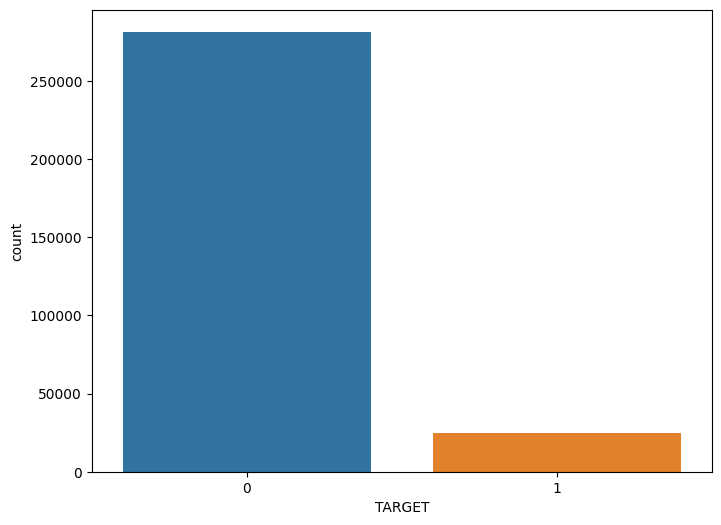

In [69]:
plot_count(x='TARGET',  data=train)

In [70]:
#untuk melihat total TARGET untuk masing-masing kategori
print(train['TARGET'].value_counts())

0    281445
1     24753
Name: TARGET, dtype: int64


<Axes: ylabel='TARGET'>

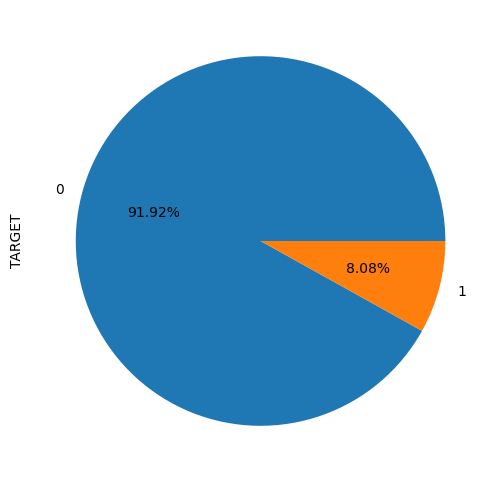

In [71]:
#pie chart TARGET (train)
plt.figure(figsize=(6,6))
train.TARGET.value_counts().plot(kind='pie',autopct='%.2f%%')

Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah TARGET dengan kategori 0 lebih banyak (281445) dibanding kategori 1 (24753) dengan persentase masing-masing adalah 91.92% dan 8.08%. Hal tersebut mengartikan bahwa pelanggan yang tidak memiliki kesulitan pembayaran jumlahnya lebih banyak (TARGET == 0).

## 2. Name Contract Type


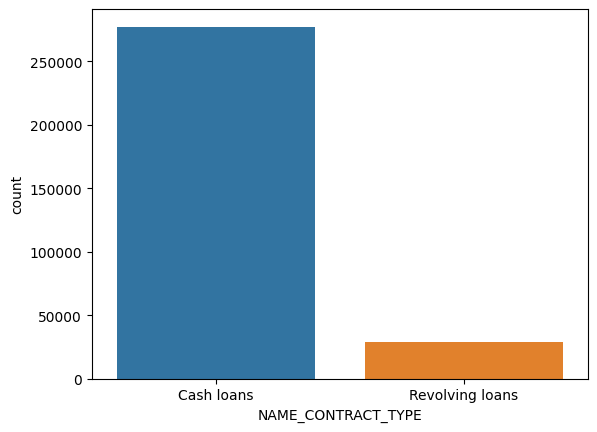

In [72]:
sns.countplot(x=train['NAME_CONTRACT_TYPE'])
plt.show()

In [73]:
print(train['NAME_CONTRACT_TYPE'].value_counts())

Cash loans         277211
Revolving loans     28987
Name: NAME_CONTRACT_TYPE, dtype: int64


Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah kategori cash loan lebih banyak (277211) dibandingkan revolving loan (28987).

## 3. Gender

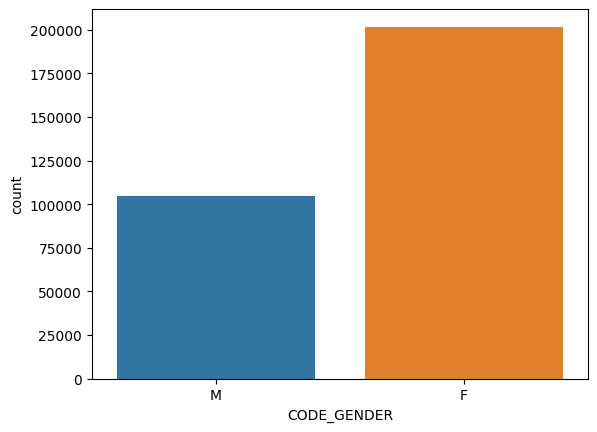

In [74]:
sns.countplot(x=train['CODE_GENDER'])
plt.show()

In [75]:
print(train['CODE_GENDER'].value_counts())

F    201631
M    104567
Name: CODE_GENDER, dtype: int64


Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah pelanggan juga didominasi oleh pelanggan perempuan yaitu sebanyak 201631 dibandingkan laki-laki (104567).

## 4. Age

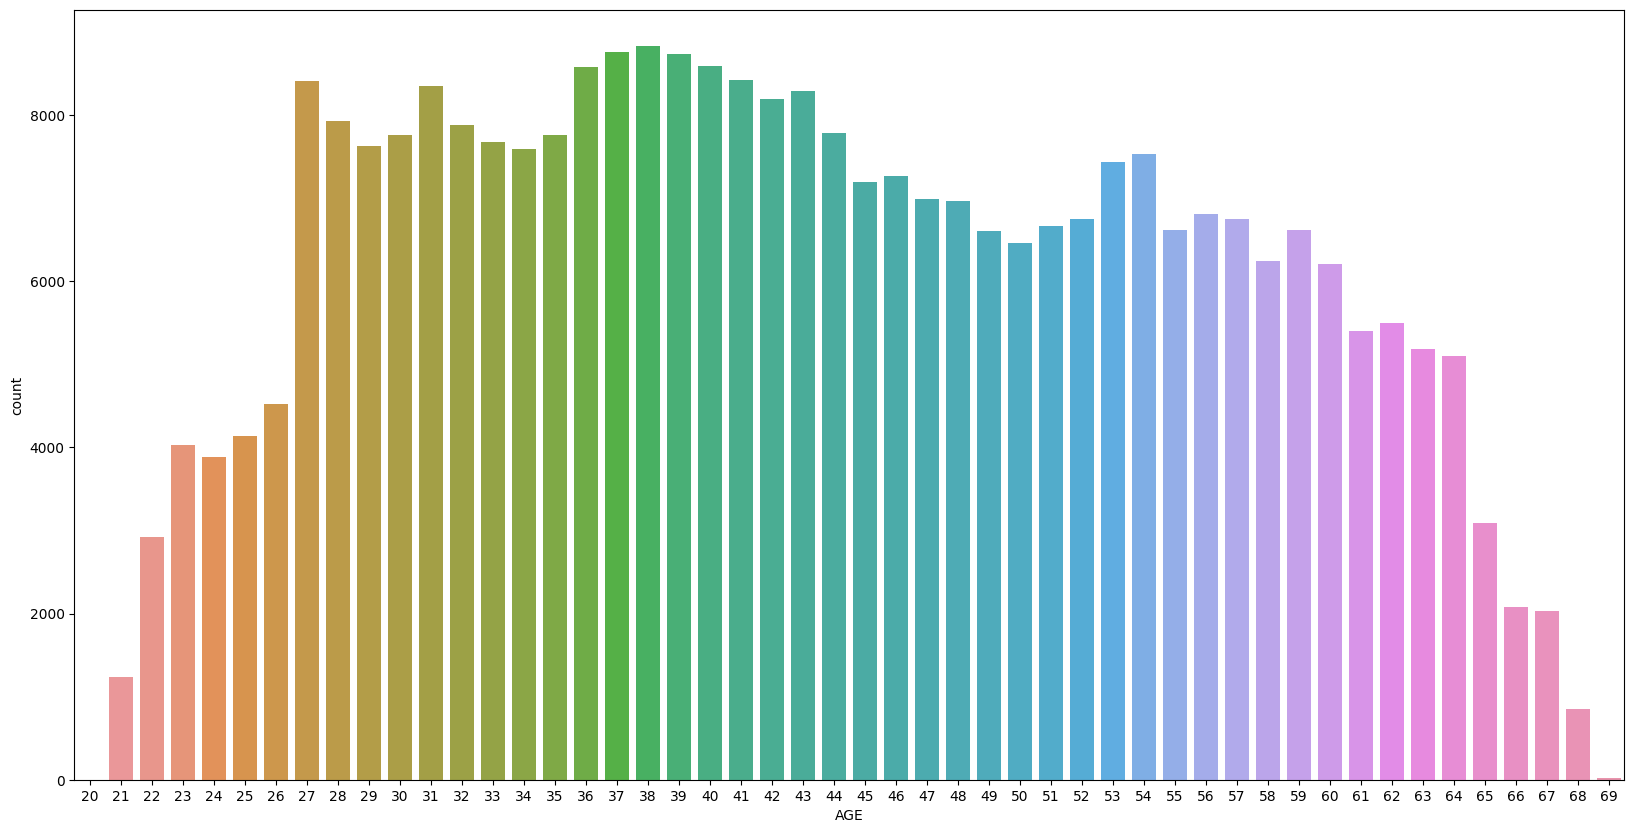

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(x=train['AGE'])
plt.show()

In [77]:
print(train['AGE'].value_counts())

38    8825
37    8758
39    8735
40    8584
36    8579
41    8418
27    8413
31    8344
43    8283
42    8188
28    7930
32    7873
44    7788
35    7762
30    7759
33    7674
29    7623
34    7595
54    7525
53    7432
46    7265
45    7188
47    6992
48    6965
56    6811
57    6747
52    6746
51    6664
55    6616
59    6615
49    6603
50    6453
58    6243
60    6208
62    5501
61    5400
63    5180
64    5098
26    4525
25    4142
23    4032
24    3881
65    3091
22    2925
66    2076
67    2033
21    1241
68     852
69      16
20       1
Name: AGE, dtype: int64


## Countplot TARGET Berdasarkan beberapa kategori

<Axes: xlabel='TARGET', ylabel='count'>

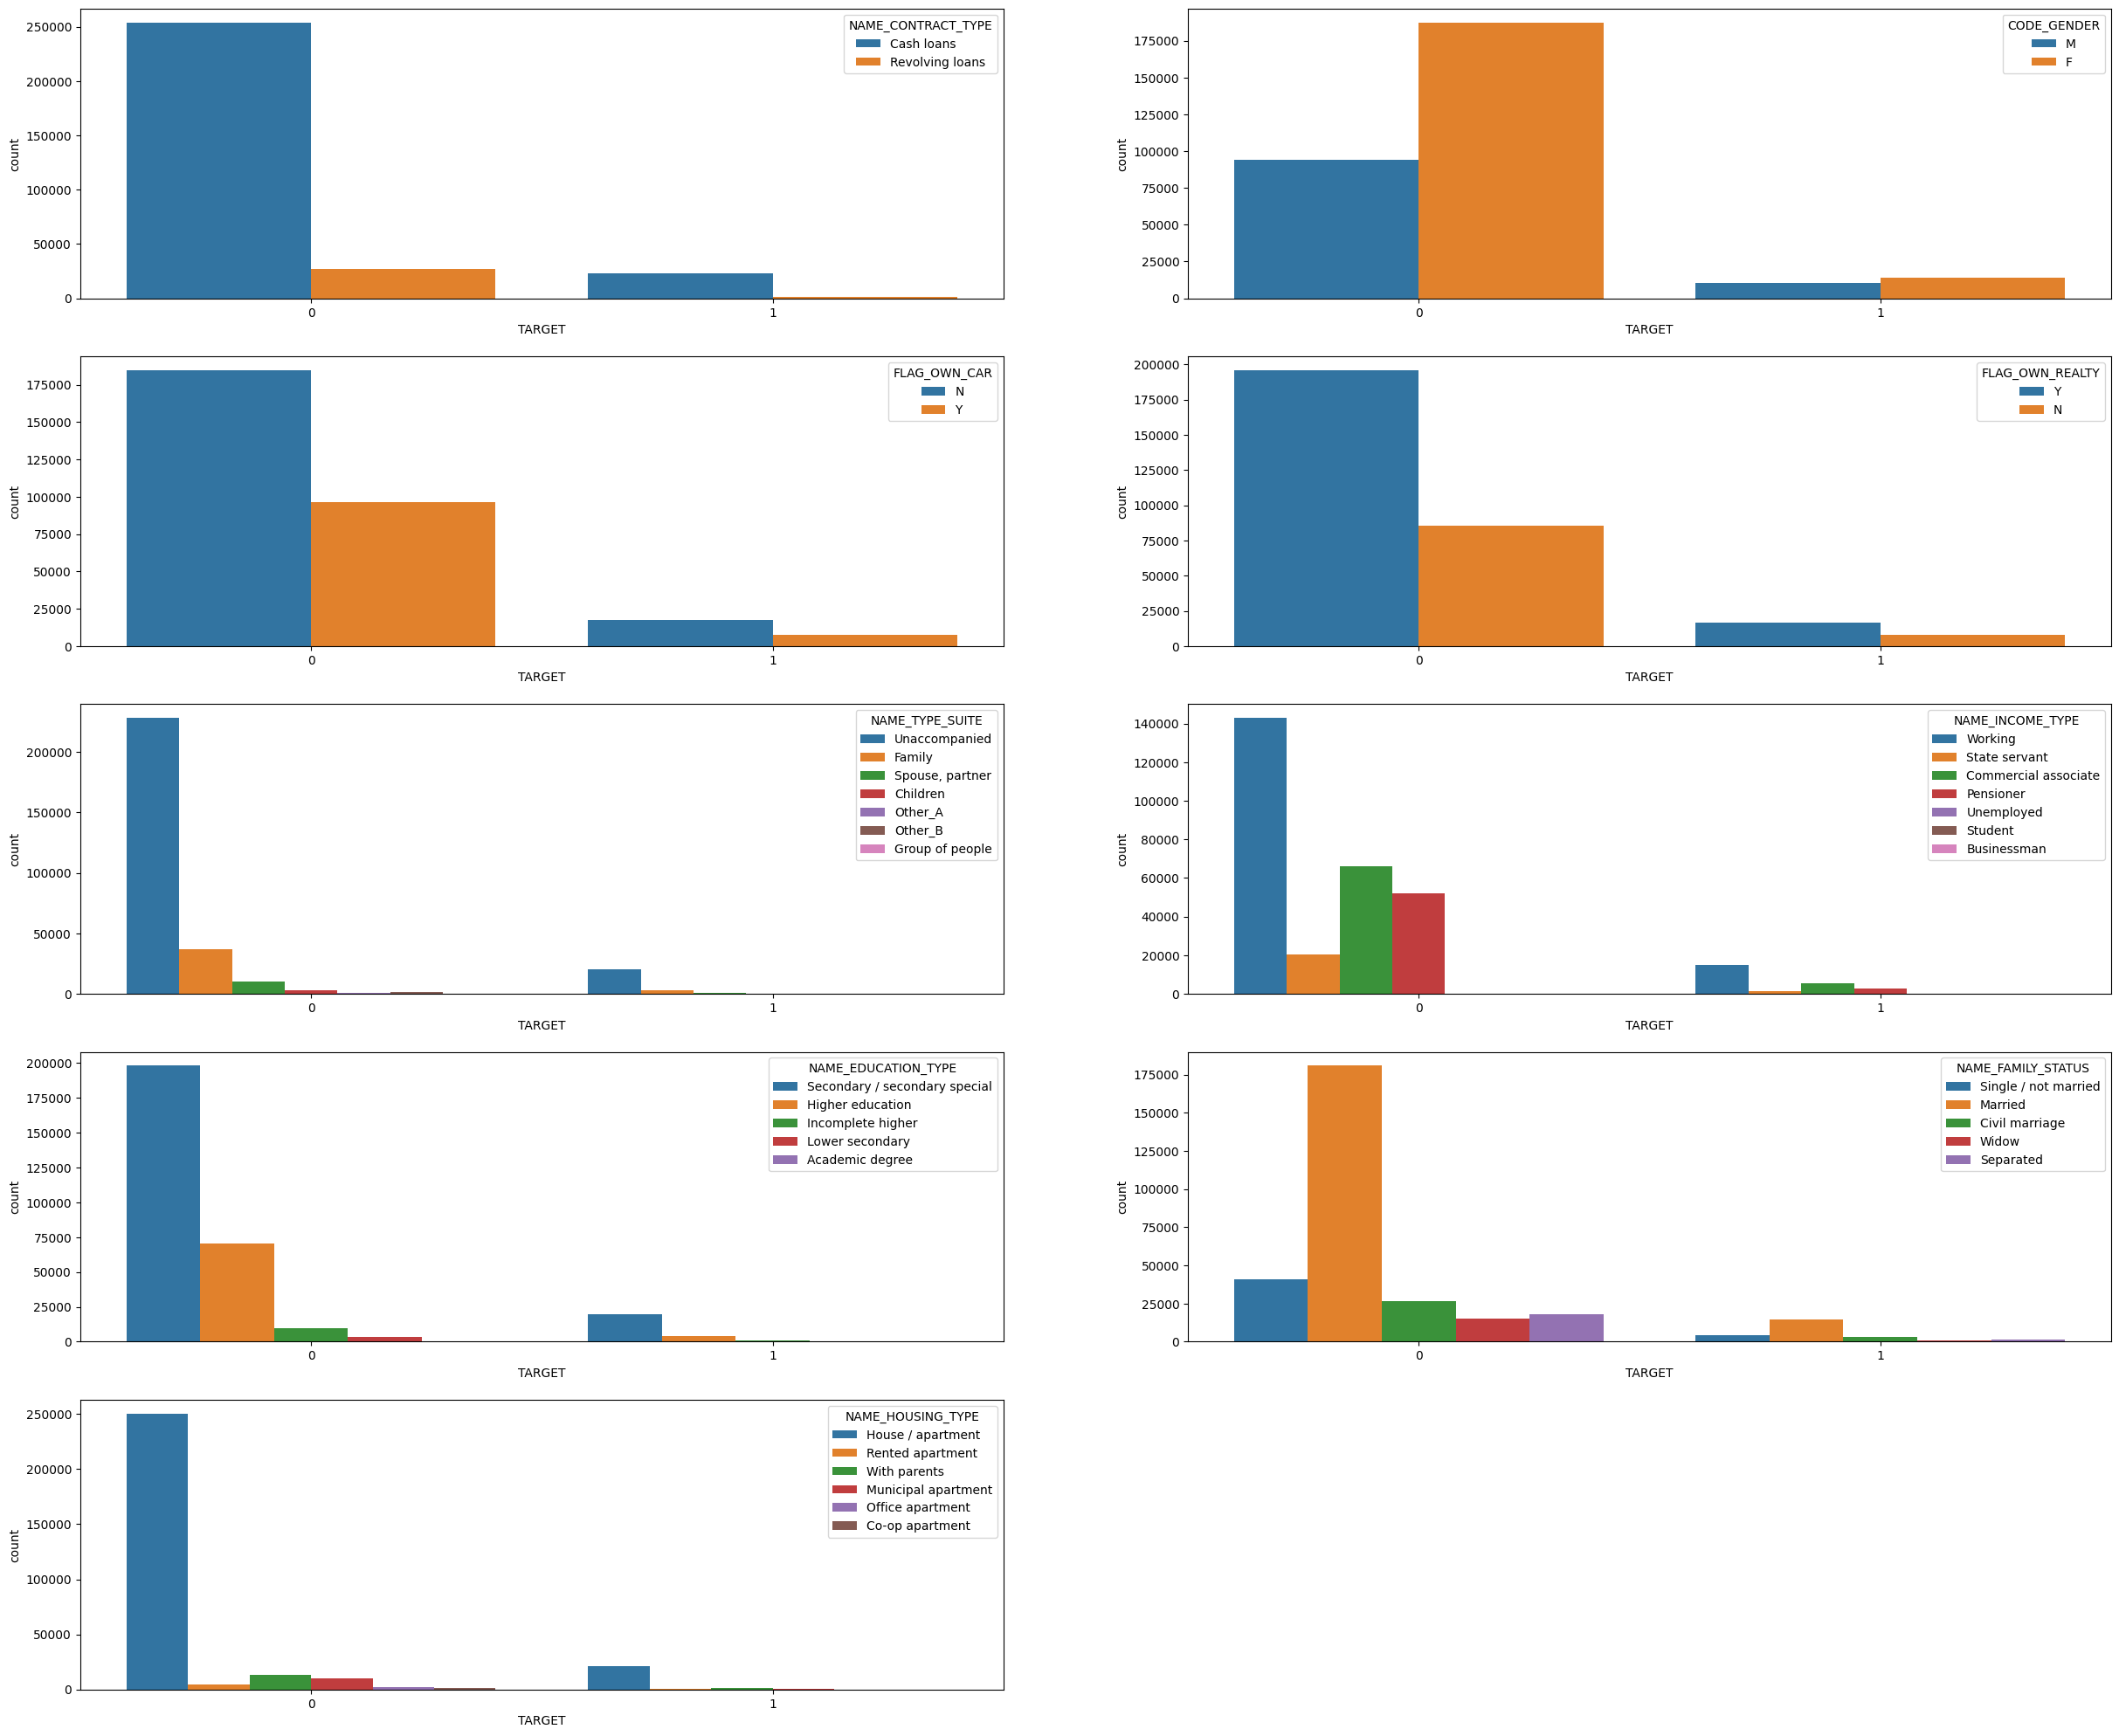

In [78]:
#Countplot TARGET Berdasarkan beberapa kategori
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=train.TARGET,hue=train.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=train.TARGET,hue=train.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=train.TARGET,hue=train.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=train.TARGET,hue=train.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=train.TARGET,hue=train.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=train.TARGET,hue=train.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=train.TARGET,hue=train.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=train.TARGET,hue=train.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=train.TARGET,hue=train.NAME_HOUSING_TYPE)

## Korelasi

<ipython-input-79-6bddfa597e6f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

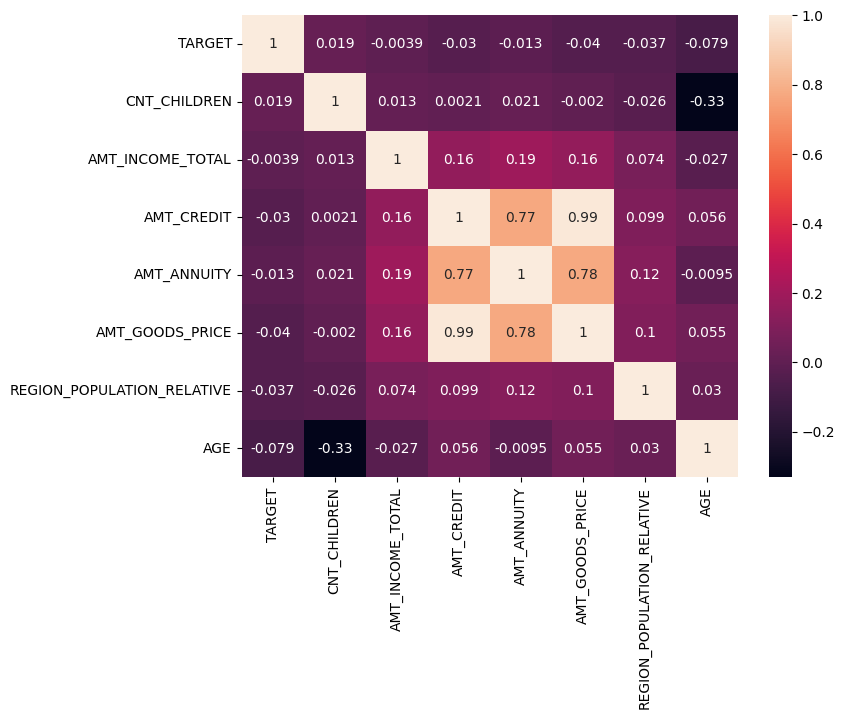

In [79]:
#membentuk heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True)

Matrix korelasi di atas menunjukkan bahwa variabel CNT_CHILDREN, ANT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, dan AGE memiliki nilai korelasi yang rendah terhadap variabel TARGET. Hal ini bisa dilihat pada nilai absolute koefisien korelasi < 0.8.

# Classification

In [80]:
X=train.drop('TARGET',axis=1)
y=train['TARGET']

In [81]:
X=pd.get_dummies(X)
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [82]:
X_test_cek=pd.get_dummies(test)
X_test_cek.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,270000.0,959688.0,34600.5,810000.0,0.025164,50,1,0,1,...,1,0,0,0,0,1,0,0,0,0


Pada kali ini, akan dilakukan pembagian data 75% untuk training dan 25% untuk testing.

In [83]:
#split data train menjadi training dan testing (untuk melihat overfitting model klasifikasi)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

Pada tahap classifiction ini, digunakan dua macam metode yaitu:

1. Regresi logistik
2. K-Nearest Neighbor

### 1. Regresi Logistik

In [92]:
#classification
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [85]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [86]:
#logistic regression
logModel = LogisticRegression()
parameter = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = RandomizedSearchCV(logModel, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression
Best Score: 0.9188845538563705
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': 0.0001}


In [97]:
#Evaluasi model regresi logistik

logModel=LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 2000, C= 0.0001).fit(X_train,y_train)
y_prediksi_log=logModel.predict(X_test)

print(classification_report(y_test,y_prediksi_log))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.00      0.00      0.00      6125

    accuracy                           0.92     76550
   macro avg       0.46      0.50      0.48     76550
weighted avg       0.85      0.92      0.88     76550



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print('Accuracy:',accuracy_score(y_test,y_prediksi_log))
print('Precision:',precision_score(y_test,y_prediksi_log,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi_log,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi_log,average='macro'))

Accuracy: 0.9199869366427171
Precision: 0.45999346832135857
Recall: 0.5
f1-score: 0.47916312298009867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berdasarkan hasil klasifikasi regresi logistik di atas, dapat dilihat bahwa nilai akurasi data testing 0.9199869366427171 atau 92% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9188845538563705 atau 91.89%. Namun, hasil prediksi menunjukkan bahwa tidak ada yang diklasifikasikan ke dalam kategori TARGET==1 sehingga model regresi logistik kurang tepat jika digunakan untuk prediksi.

### 2. K-Nearest Neighbor

In [99]:
knn = KNeighborsClassifier()
parameter = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance']}
clf_knn = RandomizedSearchCV(knn, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2,  n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNN
Best Score: 0.9174867649566574
Best Parameters: {'weights': 'uniform', 'n_neighbors': 9}


In [100]:
knn=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X_train,y_train)
y_prediksi=knn.predict(X_test)

print(classification_report(y_test,y_prediksi))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.23      0.01      0.01      6125

    accuracy                           0.92     76550
   macro avg       0.57      0.50      0.49     76550
weighted avg       0.86      0.92      0.88     76550



In [101]:
print('Accuracy:',accuracy_score(y_test,y_prediksi))
print('Precision:',precision_score(y_test,y_prediksi,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi,average='macro'))

Accuracy: 0.9186936642717178
Precision: 0.5734267520107555
Recall: 0.5023529735642926
f1-score: 0.4853019678128159


Berdasarkan hasil klasifikasi dengan metode KNN di atas, dapat dilihat bahwa nilai akurasi data testing 0.9186936642717178 atau 91.87% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9174867649566574 atau 91.75% sehingga metode KNN tersebut layak digunakan.





# Prediksi Data Testing

In [102]:
knn_test=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X,y)
y_prediksi_test=knn_test.predict(X_test_cek)

In [103]:
y_prediksi_test=pd.DataFrame(y_prediksi_test)
y_prediksi_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
47804,0
47805,0
47806,0
47807,0


<Axes: >

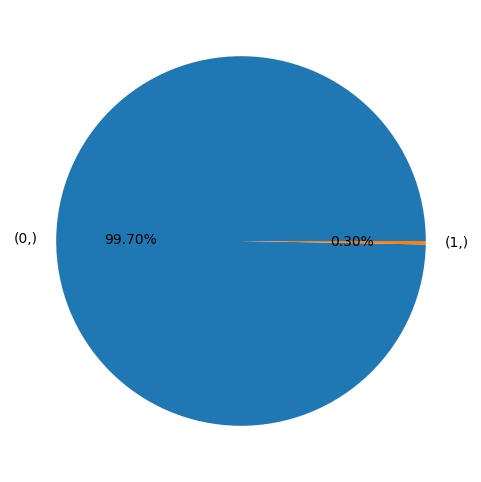

In [104]:
#persentase prediksi variabel TARGET
plt.figure(figsize=(6,6))
y_prediksi_test.value_counts().plot(kind='pie',autopct='%.2f%%')

In [105]:
y_prediksi_test.value_counts()

0    47665
1      144
dtype: int64

# Rekomendasi



*   Home Credit Indonesia harus memberikan perhatian
khusus kepada pelanggan yang memilih pinjaman cash loans, sedang bekerja, sudah manikah, dan memiliki rumah atau apartment karena mereka adalah pelanggan dengan proporsi tertinggi yang tidak mengalami kesulitan pembayaran.


*   Disarankan untuk membentuk model klasifikasi dengan metode lain. Hal tersebut dikarenakan jumlah pelanggan yang tidak mengalami kesulitan pembayaran lebih banyak dibandingkn yang mengalami kesulitan pembayaran sehingga dataset menjadi imbalance.





# Referensi

https://github.com/alimhdan/Home-Credit-Indonesia

https://www.kaggle.com/code/kenjee/titanic-project-example